# SMOTE (Synthetic Minority Oversampling Technique) - Utkarsh Gaikwad

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples = 1000, n_redundant=0,n_features=2, n_clusters_per_class=1,
                    weights=[0.90], random_state=12)

In [3]:
X[0:5]

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       [-2.02328392, -0.42894472],
       [-0.81292105, -1.31620563]])

In [4]:
y[0:5]

array([0, 0, 0, 1, 0])

In [5]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
df_final = pd.concat([df1,df2],axis=1)
df_final.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
df_final['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

<AxesSubplot: >

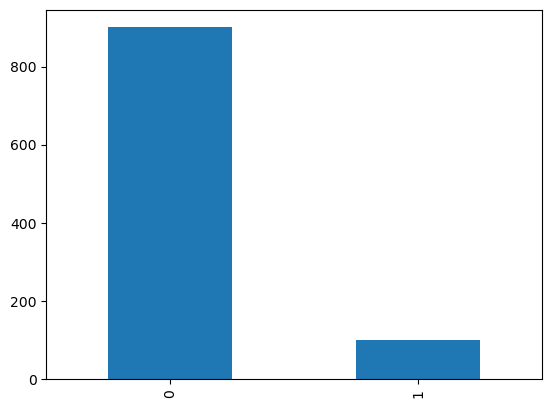

In [7]:
df_final['target'].value_counts().plot(kind='bar')

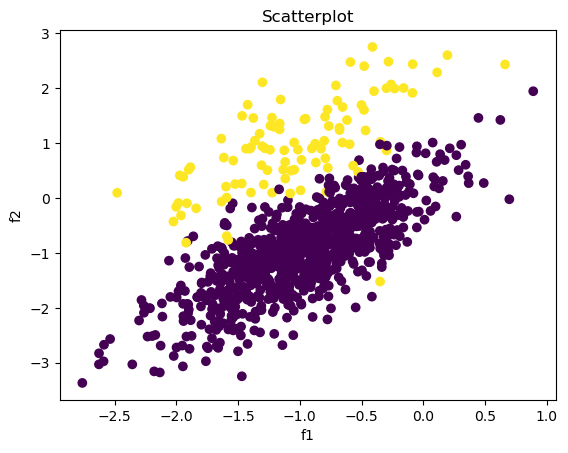

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x = df_final['f1'],y=df_final['f2'],c=df_final['target'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Scatterplot')
plt.show()

In [9]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
smt = SMOTE(random_state=42)
X_res,y_res = smt.fit_resample(df_final[['f1','f2']],df_final[['target']])

In [12]:
X_res.shape

(1800, 2)

In [13]:
y_res.shape

(1800, 1)

In [14]:
y_res.value_counts()

target
0         900
1         900
dtype: int64

<AxesSubplot: xlabel='target'>

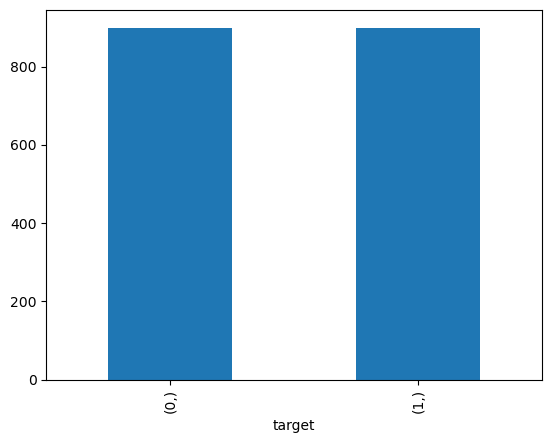

In [15]:
y_res.value_counts().plot(kind='bar')

In [16]:
df_smote = pd.concat([X_res, y_res],axis=1)

In [17]:
df_smote.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


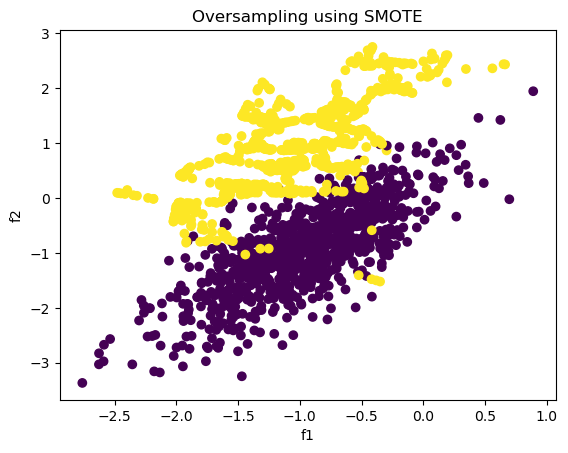

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df_smote['f1'],df_smote['f2'],c=df_smote['target'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Oversampling using SMOTE')
plt.show()

## Combined Under and Over Sampling , SMOTE Tomek

In [19]:
X, y = make_classification(n_samples = 1000, n_redundant=0,n_features=2, n_clusters_per_class=1,
                    weights=[0.90], random_state=12)

In [20]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
df_final = pd.concat([df1,df2],axis=1)
df_final.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [21]:
df_final['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [22]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(df_final[['f1','f2']], df_final[['target']])

In [23]:
X_res.shape

(1772, 2)

In [24]:
y_res.shape

(1772, 1)

In [25]:
df_smotetmk = pd.concat([X_res, y_res],axis=1)

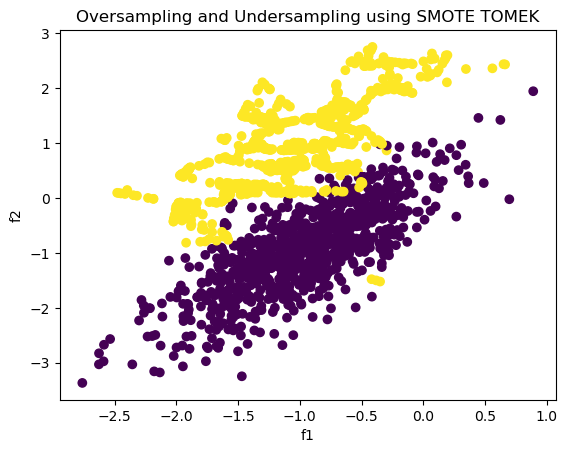

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df_smotetmk['f1'],df_smotetmk['f2'],c=df_smotetmk['target'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Oversampling and Undersampling using SMOTE TOMEK')
plt.show()